In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

from src.common_types import Edge, Node

# plot size
plt.rcParams['figure.figsize'] = (6, 4) 

# 1. Representations

Here we consider undirected unweighted graphs (see 0.3.1. in `0_introduction.ipynb`).

Let us look into various ways to represent and store graphs in memory, and the trade-offs between them. Moreover, we will discuss how to implement conversion functions between these representations.

Let us also define some common types here. 

Note that in general, a node can store any data. Here we set the node type to `int` for simplicity, but a mappping from node to data can be easily implemented (`type NodeData = dict[Node, Anything]`):


In [2]:
# let us look at some common types here

print(Node)
print(Edge)

<class 'int'>
tuple[int, int]


Let's take the following graph as an example. 

Here we use the `networkx` library to build and visualize the graph. In this course, we will only use it for visualization and validation purposes since we will build our own functionality for graph manipulation.

In [3]:
EDGES: list[Edge] = [(0, 1), (0, 2), (0, 3), (1, 2), (2, 3), (3, 0), (3, 4), (3, 5)]

g = nx.Graph(EDGES)


Run the next cell to visualize the example graph.

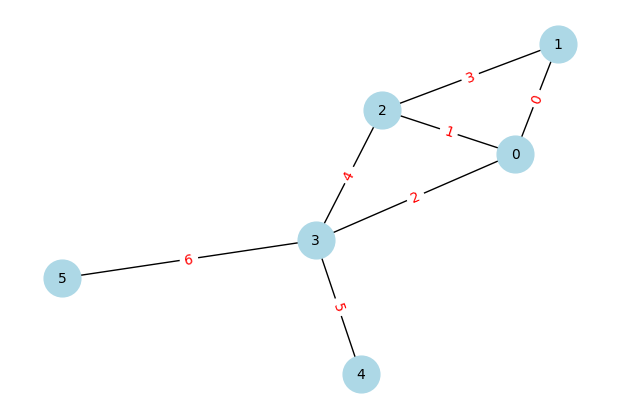

In [4]:
pos = nx.spring_layout(g)
nx.draw(g, pos, with_labels=True, node_color='lightblue', node_size=700, font_size=10)

edge_labels = {edge: idx for idx, edge in enumerate(g.edges)}
_ = nx.draw_networkx_edge_labels(g, pos, edge_labels=edge_labels, font_color='red')

## Adjacency Matrix

The _adjacency matrix_ of a graph $G$ is a matrix of size $n \times n$, where $n$ is the number of nodes in the graph. The entry $A_{ij}$ is $1$ if there is an edge between nodes $i$ and $j$, and 0 otherwise.

$$
A = 
\begin{pmatrix}
0 & 1 & 1 & 1 & 0 & 0 \\
1 & 0 & 1 & 0 & 0 & 0 \\
1 & 1 & 0 & 1 & 0 & 0 \\
1 & 0 & 1 & 0 & 1 & 1 \\
0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 \\
\end{pmatrix}
$$

Note that the adjacency matrix is symmetric ($A = A^\text{T}$) for undirected graphs:
$$
A_{ij} = A_{ji} \;\;\; \forall i, j
$$
In other words, if there is an edge between nodes $i$ and $j$, there is also an edge between nodes $j$ and $i$.

In [5]:
adjacency_matrix = nx.adjacency_matrix(g).todense()
print(adjacency_matrix)

[[0 1 1 1 0 0]
 [1 0 1 0 0 0]
 [1 1 0 1 0 0]
 [1 0 1 0 1 1]
 [0 0 0 1 0 0]
 [0 0 0 1 0 0]]


Let us verify that the adjacency matrix of the graph above is indeed symmetric.

In [6]:
np.all(adjacency_matrix == adjacency_matrix.T)

True

## Incidence Matrix

The incidence matrix 

In [7]:
incidence_matrix = nx.incidence_matrix(g, oriented=False)
incidence_matrix_dense = incidence_matrix.toarray()

In [8]:
incidence_matrix_dense

array([[1., 1., 1., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 1., 1., 0., 0.],
       [0., 0., 1., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.]])

## Adjacency List

In [9]:
adjacency_list = nx.generate_adjlist(g)
print(*adjacency_list)

0 1 2 3 1 2 2 3 3 4 5 4 5


## Edge List

# Tasks

## Task 1.1